# Red Neuronal

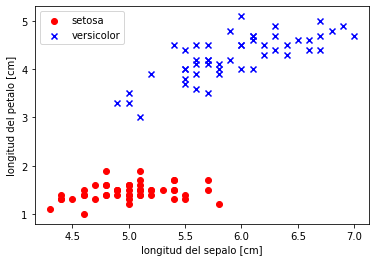

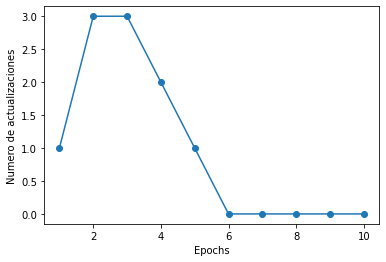

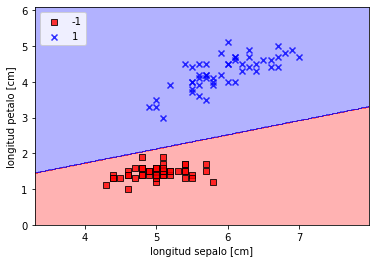

In [1]:
# -*- coding: utf-8 -*-

import numpy as np   

class Perceptron:
    """clasificador Perceptron.
    Parametros
    ------------
    eta : float
      Velocidad de aprendizaje (entre 0.0 and 1.0)
    n_iter : int
      Pasos sobre el conjunto de entrenamiento.
    randomEdo : int
      Generador de números aleatorias para el peso aleatorio inicial

    Atributos
    -----------
    w_ : 1d-array
      Pesos antes del filtrado.
    errores_ : list
      Numero de malas clasificaciones (actualizaciones) en cada epoch
    """
    
    def __init__(self, eta=0.01, n_iter=50, randomEdo=1):
        self.eta = eta
        self.n_iter = n_iter
        self.randomEdo = randomEdo

    def fit(self, X, y):
        """Datos de entrenamiento
        Parametros
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Vectores de entrenamiento, donde n_samples es el numero de ejemplos
          y n_features es el número de características
        y : array-like, shape = [n_samples]
          Valores objetivo.
        Regresa
        -------
        self : object
        """
        rgen = np.random.RandomState(self.randomEdo)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errores_ = []

        for _ in range(self.n_iter):
            errores = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errores += int(update != 0.0)
            self.errores_.append(errores)
        return self

    def net_input(self, X):
        """Calcula la red de entrada"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Regresa la etiqueta de la clase después del unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail ()

#selecciona setosa y versicolor
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)

#extracción de la longitud del sepalo y del petalo
X=df.iloc[0:100,[0,2]].values

#graficación
plt.scatter(X[:50,0],X[:50,1], color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='blue',marker='x',label='versicolor')
plt.xlabel('longitud del sepalo [cm]')
plt.ylabel('longitud del petalo [cm]')
plt.legend(loc='upper left')
plt.show()
    
ppn=Perceptron(eta=0.01, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errores_)+1), ppn.errores_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Numero de actualizaciones')
plt.show()

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # inicializador de marcas, colores y mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # grafica la superficie de decision
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # grafica las clases de ejemplos
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('longitud sepalo [cm]')
plt.ylabel('longitud petalo [cm]')
plt.legend(loc='upper left')

plt.show()

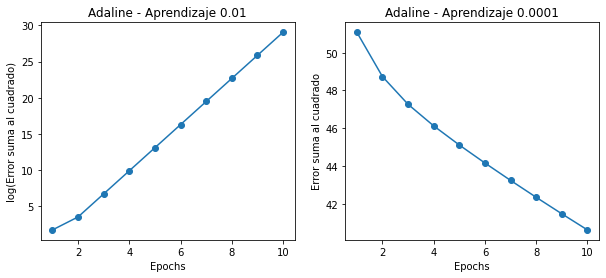

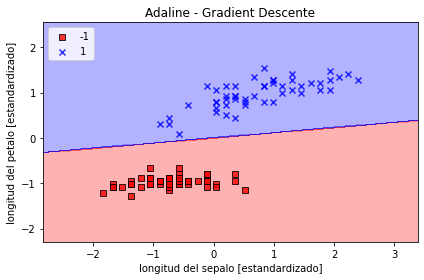

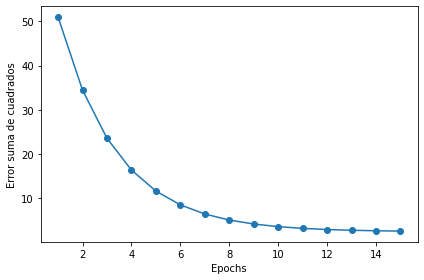

In [2]:
# -*- coding: utf-8 -*-

import numpy as np   
import matplotlib.pyplot as plt
import pandas as pd

class Adaline:
    """clasificador Adaline
    Parametros
    ------------
    eta : float
      Velocidad de aprendizaje (entre 0.0 and 1.0)
    n_iter : int
      Pasos sobre el conjunto de entrenamiento.
    randomEdo : int
      Generador de números aleatorias para el peso aleatorio inicial

    Atributos
    -----------
    w_ : 1d-array
      Pesos antes del filtrado.
    costo_ : list
      Valor de la función de costo de la suma de cuadrados en cada epoch
    """
    
    def __init__(self, eta=0.01, n_iter=50, randomEdo=1):
        self.eta = eta
        self.n_iter = n_iter
        self.randomEdo = randomEdo

    def fit(self, X, y):
        """Ajuste con los datos de entrenamiento
        Parametros
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Vectores de entrenamiento, donde n_samples es el numero de ejemplos
          y n_features es el número de características
        y : array-like, shape = [n_samples]
          Valores objetivo.
        Regresa
        -------
        self : object
        """
        rgen = np.random.RandomState(self.randomEdo)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.costo_ = []

        for _ in range(self.n_iter):
            entrada=self.net_input(X)
            salida=self.activacion(entrada)
            errores=(y-salida)
            self.w_[1:] += self.eta*X.T.dot(errores)
            self.w_[0] += self.eta*errores.sum()
            costo=(errores**2).sum()/2.0
            self.costo_.append(costo)
        return self

    def net_input(self, X):
        """Calcula la red de entrada"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activacion(self,X):
        """Calcula la activación lienal"""
        return X

    def predict(self, X):
        """Regresa la etiqueta de la clase después del unit step"""
        return np.where(self.activacion(self.net_input(X)) >= 0.0, 1, -1)

df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail ()

#selecciona setosa y versicolor
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)

#extracción de la longitud del sepalo y del petalo
X=df.iloc[0:100,[0,2]].values    

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = Adaline(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.costo_) + 1), np.log10(ada1.costo_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Error suma al cuadrado)')
ax[0].set_title('Adaline - Aprendizaje 0.01')

ada2 = Adaline(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.costo_) + 1), ada2.costo_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Error suma al cuadrado')
ax[1].set_title('Adaline - Aprendizaje 0.0001')

plt.show()

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # inicializador de marcas, colores y mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # grafica la superficie de decision
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # grafica las clases de ejemplos
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')


# estandarización de características
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = Adaline(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descente')
plt.xlabel('longitud del sepalo [estandardizado]')
plt.ylabel('longitud del petalo [estandardizado]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

plt.plot(range(1, len(ada.costo_) + 1), ada.costo_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error suma de cuadrados')

plt.tight_layout()
plt.show()